In [87]:
import librosa
import numpy as np
from pydub import AudioSegment
import os
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:

def calculate_delta(array):
    rows, cols = array.shape
    deltas = np.zeros((rows, 20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i - j < 0:
                first = 0
            else:
                first = i - j
            if i + j > rows - 1:
                second = rows - 1
            else:
                second = i + j
            index.append((second, first))
            j += 1
        deltas[i] = (array[index[0][0]] - array[index[0][1]] + (2 * (array[index[1][0]] - array[index[1][1]]))) / 10
    return deltas


In [89]:
def extract_features(audio, rate):
    mfcc_feature = mfcc.mfcc(audio, rate, 0.025, 0.01, 20, nfft=1200, appendEnergy=True)
    mfcc_feature = preprocessing.scale(mfcc_feature)
    # delta = calculate_delta(mfcc_feature)
    # combined = np.hstack((mfcc_feature, delta))
    return mfcc_feature


In [90]:
def convert_to_Wav(mp3_file):
    global i
    dir_ = './apis/Website Data/amr-other'
    record_names = list(os.listdir(dir_))

    max = 0
    for name in record_names:
        if max < int(name.split('.')[0]):
            max = int(name.split('.')[0])

    dist = './apis/Website Data/amr-other/' + str(max + 1) + '.wav'

    sound = AudioSegment.from_mp3(mp3_file)
    sound.export(dist, format="wav")

    return dist

In [91]:
path = 'D:/My PC/Projects/DSP/Voice-Recognition-System/vrs-server/apis/Website Data/Ibrahim/1.wav'
sr, audio = read(path)
vector = extract_features(audio, sr)

In [92]:
path3 = 'D:/My PC/Projects/DSP/Voice-Recognition-System/vrs-server/apis/Website Data/Ibrahim/5.wav'
sr3, audio3 = read(path3)
vector3 = extract_features(audio3, sr3)

In [93]:
mfcc_sum = vector.mean(axis=0)

In [94]:
mfcc_sum3 = vector3.mean(axis=0)

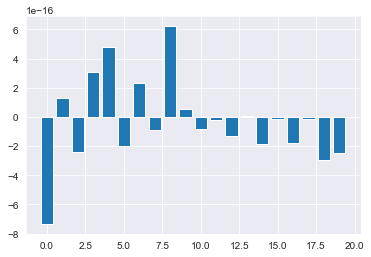

In [95]:
plt.bar(np.arange(len(mfcc_sum)),mfcc_sum)
plt.show()

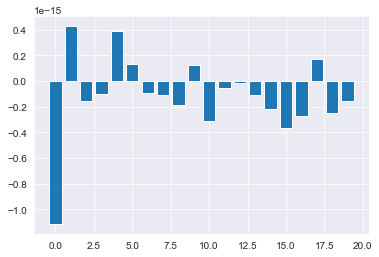

In [96]:
plt.bar(np.arange(len(mfcc_sum3)),mfcc_sum3)
plt.show()

In [97]:
path2 = 'D:/My PC/Projects/DSP/Voice-Recognition-System/vrs-server/apis/Website Data/Amr/5.wav'
sr2, audio2 = read(path2)
vector2 = extract_features(audio2, sr2)

In [98]:
mfcc_sum2 = vector2.mean(axis=0)

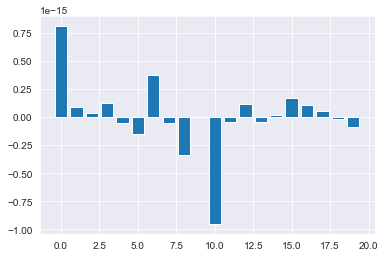

In [99]:
plt.bar(np.arange(len(mfcc_sum2)),mfcc_sum2)
plt.show()

In [105]:
path4 = 'D:/My PC/Projects/DSP/Voice-Recognition-System/vrs-server/apis/Website Data/Amr/8.wav'
sr4, audio4 = read(path4)
vector4 = extract_features(audio4, sr4)

In [106]:
mfcc_sum4 = vector4.mean(axis=0)

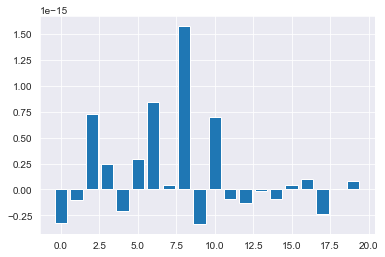

In [107]:
plt.bar(np.arange(len(mfcc_sum4)),mfcc_sum4)
plt.show()